In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import jieba
import jieba.analyse
from wordcloud import WordCloud


# 读取数据

In [9]:
df = pd.read_csv("douban_queen_reviews.csv")

# 分词

In [10]:
#加载外部分词字典
jieba.load_userdict("userdict.txt")

# 使用jieba进行中文分词
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

In [12]:
# 先处理缺失值，将缺失值替换为一个空字符串或其他合适的值
df['content'].fillna('', inplace=True)
# 对DataFrame的'content'列应用中文分词
df['content_segmented'] = df['content'].apply(chinese_segmentation)

In [13]:
df['content_segmented']

0      前 几天 有 一句 十分 歹毒 的 骂人 话 冲 上 了 热 搜 ， 出处 是 正在 播出 ...
1      一不小心 一口气 追剧 到   12   集 。 不说 一些 浮夸 的 剧情 ， 剧情 来自...
2      今晚 看 《 新闻 女王 》 第   15   集 ， 很 有意思 。 文慧心 回到 家 ，...
3      “ 找个 男人 嫁 了 吧 ” 比 以前   TVB   宫斗剧 扇 耳光 更 “ 狠 ” ...
4      在 正式 看 这部 剧 之前 ， 光听 名字 就 觉得 像 个 烂剧 ， “ 女王 ” 两个...
                             ...                        
176    很久没 见 一部 剧 值得 给 长评 了 ， 这部 大约 是 值得 的 。 只是 等 了 这...
177    文   \   榴花 照图   \   源自 网络 ， 侵删 致歉 ------------...
178    《 新闻 女王 》 是 用 宫斗剧 的 打法 拍 现代 职场 剧 。 第十集 ， 文慧心 成...
179    1 .   新闻 主播 英语 「 Anchor 」 \n 原 解作 固定 船身 的 锚 \n...
180    今年 我 觉得 最 魔幻现实主义 的 事 发生 了 ， 当内 娱在 播放 《 以爱为 营 》...
Name: content_segmented, Length: 181, dtype: object

# 同义词替换

In [14]:
# 加载同义词文件
synonym_file_path = 'synonym.txt'
synonym_dict = {}

# 读取同义词文件，创建同义词典，将同义词映射到主词
with open(synonym_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) > 1:
            main_word = parts[0]
            synonyms = parts[1:]
            for synonym in synonyms:
                synonym_dict[synonym] = main_word

# 替换同义词的函数（针对已分词的情况）
def replace_synonyms(words):
    # 使用同义词典替换同义词为主词
    replaced_words = [synonym_dict.get(word, word) for word in words]

    # 将分词结果拼接成字符串
    return " ".join(replaced_words)

# 对 'content_segmented' 列应用替换同义词的函数
df['content_segmented'] = df['content_segmented'].apply(lambda x: replace_synonyms(x.split()))

# 显示替换同义词后的 DataFrame
print(df['content_segmented'])


0      前 几天 有 一句 十分 歹毒 的 骂人 话 冲 上 了 热 搜 ， 出处 是 正在 播出 ...
1      一不小心 一口气 追剧 到 12 集 。 不说 一些 浮夸 的 剧情 ， 剧情 来自 生活 ...
2      今晚 看 《 新闻 女王 》 第 15 集 ， 很 有意思 。 文慧心 回到 家 ， 发现 ...
3      “ 找个 男人 嫁 了 吧 ” 比 以前 TVB 宫斗剧 扇 耳光 更 “ 狠 ” 啊 ， ...
4      在 正式 看 这部 剧 之前 ， 光听 名字 就 觉得 像 个 烂剧 ， “ 女王 ” 两个...
                             ...                        
176    很久没 见 一部 剧 值得 给 长评 了 ， 这部 大约 是 值得 的 。 只是 等 了 这...
177    文 \ 榴花 照图 \ 源自 网络 ， 侵删 致歉 --------------------...
178    《 新闻 女王 》 是 用 宫斗剧 的 打法 拍 现代 职场 剧 。 第十集 ， 文慧心 成...
179    1 . 新闻 主播 英语 「 Anchor 」 原 解作 固定 船身 的 锚 引申 稳住 新...
180    今年 我 觉得 最 魔幻现实主义 的 事 发生 了 ， 当内 娱在 播放 《 以爱为 营 》...
Name: content_segmented, Length: 181, dtype: object


# 哪些影视作品被quote到

In [32]:
import re
import pandas as pd

# 提取包含在《》中的字符串的函数
def extract_titles(text):
    # 使用正则表达式提取《》中的字符串
    matches = re.findall(r'《(.*?)》', text)
    return matches

# 创建一个空的 DataFrame
df_movie = pd.DataFrame(columns=['Movie Title', 'Original Title'])

# 遍历 content_segmented 列
for index, row in df.iterrows():
    # 从 content 中提取标题
    titles = extract_titles(row['content'])
    
    # 遍历提取的标题
    for title in titles:
        # 将信息添加到新的 DataFrame
        df_movie = pd.concat([df_movie, pd.DataFrame({'Movie Title': [title], 'Original Title': [row['title']]})], ignore_index=True)

# 打印结果或进行其他操作
print(df_movie)


    Movie Title                  Original Title
0          新闻女王  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
1          新闻女王  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
2       花儿与少年 5  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
3         花儿与少年  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
4          新闻女王  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
..          ...                             ...
273        新闻女王               有人骂你野心勃勃，有人爱你灵魂有火
274        新闻女王               有人骂你野心勃勃，有人爱你灵魂有火
275        新闻女王               有人骂你野心勃勃，有人爱你灵魂有火
276        新闻女王               有人骂你野心勃勃，有人爱你灵魂有火
277       我本是高山               有人骂你野心勃勃，有人爱你灵魂有火

[278 rows x 2 columns]


In [33]:
df_movie.to_excel("df_movie.xlsx")

In [34]:
# 使用 drop_duplicates 方法去除同一 Original Title 下的重复 Movie Title
df_unique_titles = df_movie[['Movie Title', 'Original Title']].drop_duplicates()

# 统计 Movie Title 的频率
title_frequency = df_unique_titles['Movie Title'].value_counts()

# 打印结果或进行其他操作
title_frequency.head(20)

Movie Title
新闻女王       52
金枝欲孽        7
延禧攻略        3
早间新闻        3
宫心计         2
问心          2
我们与恶的距离     2
陀枪师姐        2
使徒行者        2
迷雾          2
鉴证实录        2
刑事侦缉档案      2
以爱为营        2
女主播         1
飞虎          1
甜蜜家园        1
辅佐官         1
棒球大联盟       1
栋笃神探        1
继承之战        1
Name: count, dtype: int64

# LDA分析

Latent Dirichlet Allocation（LDA）是一种用于从文档集合中发现主题的概率模型。该模型基于以下基本假设：

1. **文档是由主题组成的：** 每个文档可以被看作是一组主题的混合，每个主题的权重不同。

2. **主题是由单词组成的：** 每个主题可以被看作是一个包含单词的概率分布，即在该主题中某个单词的概率。

LDA的目标是找到这样的主题分布，使得通过组合这些主题就能生成观察到的文档。在推断的过程中，我们希望找到每个文档的主题分布以及每个主题的单词分布。

下面是LDA模型的一般步骤：

1. **准备文档集合：** 将文本数据集表示为一个文档集合，其中每个文档是一个由单词组成的序列。

2. **文本预处理：** 对文档进行分词、去停用词、词干化等预处理操作。

3. **创建词袋模型或TF-IDF模型：** 将文档转化为词袋模型或TF-IDF模型，得到文档-词矩阵。

4. **构建LDA模型：** 使用文档-词矩阵训练LDA模型，指定主题数量等参数。

5. **推断：** 对新文档进行推断，得到新文档的主题分布。

6. **解释主题：** 分析模型输出，解释每个主题代表的含义。这可能需要查看主题中最重要的单词。

LDA模型的输出包括文档-主题分布和主题-单词分布。这些分布可用于理解文本数据中的主题结构，帮助主题建模和文本分析。

总体而言，LDA是一种强大的工具，适用于从大规模文本数据中提取主题信息，例如新闻文章、社交媒体帖子、学术论文等。

In [42]:
# 导入所需的库
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from nltk.corpus import stopwords
from gensim import matutils
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# 预处理文本数据
# 在这里，我们使用gensim的预处理函数，包括分词、去除停用词等

# 步骤1：从外部文件读取停用词
with open("stopwords.txt", "r", encoding="utf-8") as file:
    stop_words = file.read().splitlines()

# 步骤2：将每一行的空格分隔单词转换为单词列表
df['content_segmented_list'] = df['content_segmented'].apply(lambda x: x.split())

# 步骤3：过滤停用词
df['content_segmented_list'] = df['content_segmented_list'].apply(lambda x: [word for word in x if word not in stop_words])

# 创建字典和语料库
dictionary = corpora.Dictionary(df['content_segmented_list'])
corpus = [dictionary.doc2bow(text) for text in df['content_segmented_list']]


- **确定最佳主题数**
   LDA模型的构建方法，指标来评估模型好坏，也可以用这些指标来确定最优主题数。
   一般用来评价LDA主题模型的指标有困惑度（perplexity）和主题一致性（coherence），困惑度越低或者一致性越高说明模型越好。一些研究表明perplexity并不是一个好的指标，所以一般用coherence来评价模型并选择最优主题，但下面代码两种方法均采用。

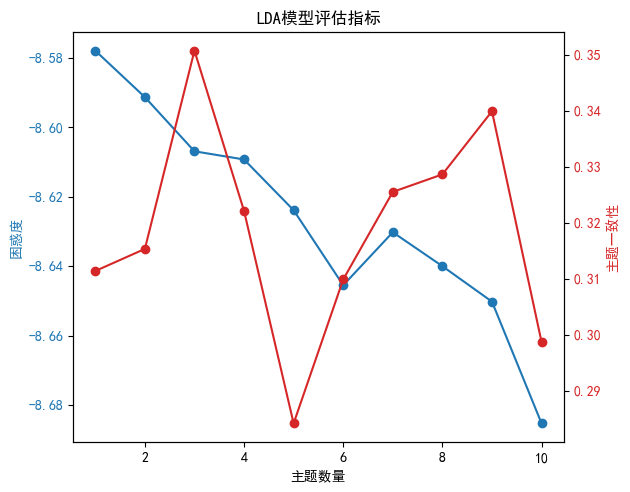

In [43]:
# 定义计算困惑度的函数
def compute_perplexity(corpus, model):
    return model.log_perplexity(corpus)

# 定义计算主题一致性的函数
def compute_coherence(corpus, model, dictionary, texts):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# 定义一个函数，用于绘制困惑度和主题一致性的图表
def plot_metrics(num_topics_list, perplexity_values, coherence_values):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('主题数量')
    ax1.set_ylabel('困惑度', color='tab:blue')
    ax1.plot(num_topics_list, perplexity_values, color='tab:blue', marker='o')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('主题一致性', color='tab:red')
    ax2.plot(num_topics_list, coherence_values, color='tab:red', marker='o')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('LDA模型评估指标')
    plt.show()


# 定义一个函数，用于训练LDA模型并计算评估指标
def train_lda_model_and_evaluate(corpus, dictionary, texts, num_topics_list):
    perplexity_values = []
    coherence_values = []

    for num_topics in num_topics_list:
        # 训练LDA模型
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

        # 计算困惑度
        perplexity = compute_perplexity(corpus, lda_model)
        perplexity_values.append(perplexity)

        # 计算主题一致性
        coherence = compute_coherence(corpus, lda_model, dictionary, texts)
        coherence_values.append(coherence)

    # 绘制图表
    plot_metrics(num_topics_list, perplexity_values, coherence_values)

# 选择要尝试的主题数量范围
num_topics_list = list(range(1, 11)) 

# 训练LDA模型并评估
train_lda_model_and_evaluate(corpus, dictionary, df['content_segmented_list'], num_topics_list)


In [45]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 指定LDA模型的主题数量
num_topics = 3

# 训练LDA模型
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 使用pyLDAvis进行可视化
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

## tf-idf方法

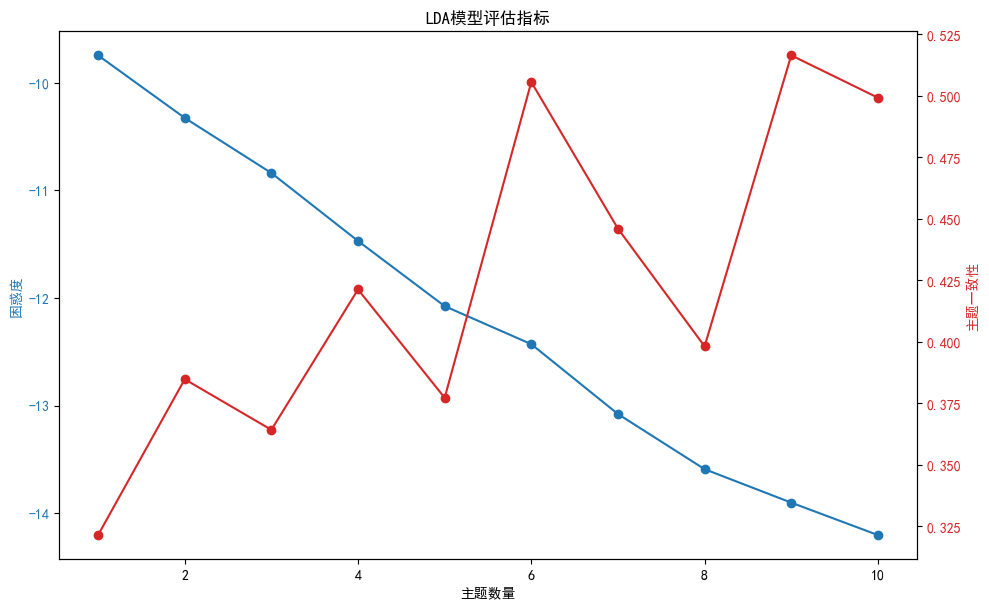

In [18]:
# 导入所需的库
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from nltk.corpus import stopwords
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 预处理文本数据
# 步骤1：从外部文件读取停用词
with open("stopwords.txt", "r", encoding="utf-8") as file:
    stop_words = file.read().splitlines()

# 步骤2：将每一行的空格分隔单词转换为单词列表
df['content_segmented_list'] = df['content_segmented'].apply(lambda x: x.split())

# 步骤3：过滤停用词
df['content_segmented_list'] = df['content_segmented_list'].apply(lambda x: [word for word in x if word not in stop_words])

# 创建字典和语料库
dictionary = corpora.Dictionary(df['content_segmented_list'])
corpus = [dictionary.doc2bow(text) for text in df['content_segmented_list']]

# 步骤4：使用TF-IDF模型
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# 定义计算困惑度的函数（使用TF-IDF模型）
def compute_perplexity_tfidf(corpus_tfidf, model):
    return model.log_perplexity(corpus_tfidf)

# 定义 compute_coherence 函数
def compute_coherence(corpus, model, dictionary, texts):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# 定义一个函数，用于绘制困惑度和主题一致性的图表
def plot_metrics(num_topics_list, perplexity_values, coherence_values):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('主题数量')
    ax1.set_ylabel('困惑度', color=color)
    ax1.plot(num_topics_list, perplexity_values, color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('主题一致性', color=color)
    ax2.plot(num_topics_list, coherence_values, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('LDA模型评估指标')
    plt.show()

# 定义一个函数，用于训练LDA模型并计算评估指标（使用TF-IDF模型）
def train_lda_model_and_evaluate_tfidf(corpus_tfidf, dictionary, texts, num_topics_list):
    perplexity_values = []
    coherence_values = []
    
    lda_model_tfidf_list = []  # 用于存储每个主题数量对应的LDA模型

    for num_topics in num_topics_list:
        # 训练LDA模型
        lda_model_tfidf = LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=15)
        lda_model_tfidf_list.append(lda_model_tfidf)  # 将模型存储起来

        # 计算困惑度
        perplexity = compute_perplexity_tfidf(corpus_tfidf, lda_model_tfidf)
        perplexity_values.append(perplexity)

        # 计算主题一致性
        coherence = compute_coherence(corpus_tfidf, lda_model_tfidf, dictionary, texts)
        coherence_values.append(coherence)

    # 绘制图表
    plot_metrics(num_topics_list, perplexity_values, coherence_values)
    
    return lda_model_tfidf_list

# 选择要尝试的主题数量范围
num_topics_list = list(range(1, 11))

# 训练LDA模型并评估（使用TF-IDF模型）
lda_model_tfidf_list = train_lda_model_and_evaluate_tfidf(corpus_tfidf, dictionary, df['content_segmented_list'], num_topics_list)


In [19]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 指定LDA模型的主题数量
num_topics = 9

# 训练LDA模型
lda_model_tfidf = LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=15)

# 使用pyLDAvis进行可视化（使用TF-IDF模型）
lda_display_tfidf = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary, sort_topics=False)
pyLDAvis.display(lda_display_tfidf)
